In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plot_routines import plot_routines
from scipy.interpolate import interp1d
import seaborn

In [2]:
# Loading the data into a plotting tool class.
micro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3/micro/mean.h5'
macro_path = '/home/jakob/Project_Divestment/PyDivestment/output_data/P3/mean/mean.h5'
with pd.HDFStore(micro_path) as store:
    micro_data = store.select('dat', 'approximate=1 & test=False & sample=0 & eps=0.05 & tau>0.5')
with pd.HDFStore(macro_path) as store:
    macro_data = store.select('dat', 'approximate=2 & test=False & sample=0 & eps=0.05 & tau>0.5')
    
for df in [micro_data, macro_data]:
    df.index = df.index.droplevel(['approximate', 'test', 'sample', 'eps'])
    df.index.names = [r'$\tau$',r'$\phi$', 'tsteps']

In [3]:
macro_data.head()

c    g     mu_c^c    mu_c^d    mu_d^c  \
$\tau$ $\phi$ tsteps                                                  
1.5    0.95   1000.0  24.044795  8.0  16.704901  0.308407  0.787122   
              1004.5  24.028056  8.0  16.704661  0.308181  0.787784   
              1009.0  24.011496  8.0  16.704423  0.307958  0.788441   
              1013.5  23.995115  8.0  16.704187  0.307737  0.789091   
              1018.0  23.978908  8.0  16.703954  0.307518  0.789734   

                         mu_d^d    time         x         y         z  \
$\tau$ $\phi$ tsteps                                                    
1.5    0.95   1000.0  21.961291  1000.0 -0.356607 -0.364436  0.040694   
              1004.5  21.961681  1004.5 -0.357000 -0.364745  0.040687   
              1009.0  21.962066  1009.0 -0.357389 -0.365051  0.040681   
              1013.5  21.962447  1013.5 -0.357774 -0.365354  0.040674   
              1018.0  21.962823  1018.0 -0.358155 -0.365653  0.040668   

                        ...          i_c       k_c        k_d       l_c  \
$\tau$ $\phi$ tsteps    ...                                               
1.5    0.95   1000.0    ...     0.211895  5.583132  15.149526  0.257441   
              1004.5    ...     0.211746  5.579676  15.154169  0.257260   
              1009.0    ...     0.211599  5.576257  15.158762  0.257081   
              1013.5    ...     0.211453  5.572874  15.163307  0.256904   
              1018.0    ...     0.211309  5.569527  15.167803  0.256729   

                           l_d       n_c         r       r_c       r_d  \
$\tau$ $\phi$ tsteps                                                     
1.5    0.95   1000.0  0.742559  0.321697  0.041925  0.096647  0.136989   
              1004.5  0.742740  0.321500  0.041937  0.096642  0.136984   
              1009.0  0.742919  0.321305  0.041948  0.096637  0.136980   
              1013.5  0.743096  0.321113  0.041959  0.096632  0.136976   
              1018.0  0.743271  0.320922  0.041971  0.096628  0.136972   

                             w  
$\tau$ $\phi$ tsteps            
1.5    0.95   1000.0  2.794770  
              1004.5  2.794859  
              1009.0  2.794946  
              1013.5  2.795033  
              1018.0  2.795119  

[5 rows x 22 columns]

In [4]:
def l_2_distance(d1, d2, observable=None):
    
    d1_data = d1[[observable]]
    d2_data = d2[[observable]]
    
    names = d1.index.names
    print(names)
    indices = {ax: list(d1.index.levels[names.index(ax)].values) for ax in names[:2]}
    print(indices)
    output = np.zeros((len(indices[names[0]]),len(indices[names[1]])))
    
    for i, n0 in enumerate(indices[names[0]]):
        for j, n1 in enumerate(indices[names[1]]):
            levels = names[:2]
            tkey = [n0, n1]
    
            # get values and times from dataframes
            d1_slice = d1_data.xs(key=tkey, level=levels).values.T[0][:-1]
            #d1_times = d1_data.xs(key=tkey, level=levels).index.values[:-1]

            d2_slice = d2_data.xs(key=tkey, level=levels).values.T[0][:-1]
            #d2_times = d2_data.xs(key=tkey, level=levels).index.values[:-1]
            
            # interpolate to get values on equal timepoints
            #d1_ipl = interp1d(d1_times, d1_slice)
            #d2_ipl = interp1d(d2_times, d2_slice)

            #samples = 200
            #times = np.linspace(d1_times[0], min(d1_times[-1], d2_times[-1]), samples)
            #d1_ipl_data = d1_ipl(times)
            #d2_ipl_data = d2_ipl(times)
            d1_ipl_data = d1_slice
            d2_ipl_data = d2_slice
            dd = d1_ipl_data - d2_ipl_data
            l2 = np.sqrt(sum(dd*dd))
            output[i, j] = l2
            
    return output, indices, names[:2]

['$\tau$', '$\phi$', 'tsteps']
{'$\\tau$': [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0], '$\\phi$': [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]}


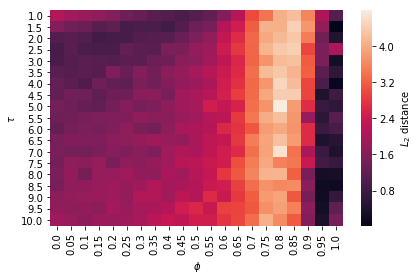

In [5]:
levels=['eps']
key=[0.05]

data, indices, ax_names = l_2_distance(micro_data, macro_data, observable='x')

fig = plt.figure()
ax = fig.add_subplot(111)

seaborn.heatmap(data,
                yticklabels=indices[ax_names[0]],
                xticklabels=[round(x, 3) for x in indices[ax_names[1]]],
                ax=ax,
                cbar_kws={'label': '$L_2$ distance'})
ax.set_ylabel(ax_names[0])
ax.set_xlabel(ax_names[1])

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('heatmap.png')
fig.savefig('heatmap.pdf')